In [2]:
import sklearn.datasets
import itertools
import numpy as np
import pdb
import matplotlib.pyplot as plt
from copy import deepcopy
from sklearn.utils import shuffle
from random import randint
from math import sqrt
import sympy as sy
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
%matplotlib inline

NMAX = 999999999

In [3]:
def get_data():
    dataset = sklearn.datasets.load_iris()
    _dataset_X = dataset['data'][:, :2]
    _dataset_Y = dataset['target']
    
    plt.scatter(_dataset_X[:, 0], _dataset_X[:, 1], marker='o', c = _dataset_Y)
        
    convert_Y = [[0,0,1],[0,1,0],[1,0,0]]
    X = np.array(_dataset_X)
    X = np.insert(X, 0, 1, axis=1)
    Y = np.array([ convert_Y[k] for k in _dataset_Y])
    return [X, Y]

def generate_data():
    N = 100
    x1 = np.random.normal(5, 3.0, size=N)
    y1 = np.random.normal(10, 3.0, size=N)
    x2 = np.random.normal(15, 3.0, size=N)
    y2 = np.random.normal(15, 3.0, size=N)
    x3 = np.random.normal(10, 3.0, size=N)
    y3 = np.random.normal(0, 3.0, size=N)
    plt.plot(x1, y1, marker='.', color='red', linestYle='')
    plt.plot(x2, y2, marker='.', color='blue', linestYle='')
    plt.plot(x3, y3, marker='.', color='green', linestYle='')
    dataset_X = []
    dataset_Y = [[1, 0, 0]]*N+[[0, 1, 0]]*N+[[0, 0, 1]]*N
    for i in range(0,N):
        dataset_X.append([1, x1[i], y1[i]])
        dataset_X.append([1, x2[i], y2[i]])
        dataset_X.append([1, x3[i], y3[i]])
    return [np.array(dataset_X), np.array(dataset_Y)]



In [4]:
def split_train_test(X, Y):
    datasize = X.shape[0]
    X, Y = shuffle(X, Y, random_state = randint(0, 100))
    train_X = X[:int(datasize*80/100)]
    train_Y = Y[:int(datasize*80/100)]
    test_X = X[int(datasize*80/100):]
    test_Y = Y[int(datasize*80/100):]
    return [train_X, train_Y, test_X, test_Y]

In [5]:

def regress (X, Y):
    beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)), X.T), Y)
    return beta


In [6]:

def find_subsets(S, m):
    return list(itertools.combinations(S, m))

def plot_lines(X, Y, beta):
    for i, j in find_subsets(range(Y.shape[1]), 2):
        x = np.linspace(min(X[:,1]), max(X[:,1]), num=100)
        f = lambda x,b1,b2: (b1[0]-b2[0]+x*(b1[1]-b2[1]))/(b2[2]-b1[2])
        axes = plt.gca()
        axes.set_ylim([min(X[:,2]), max(X[:,2])])
        plt.plot(x, f(x,beta.T[i], beta.T[j]), marker='', color='black', linestYle='-')
        

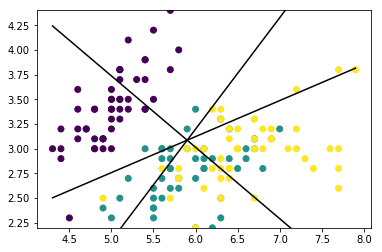

In [7]:
dataset_X, dataset_Y = get_data()
# dataset_X, dataset_Y = generate_data()
no_runs = 1

for i in range(0,no_runs):
    train_X, train_Y, test_X, test_Y = split_train_test(dataset_X,dataset_Y)
    beta = regress(train_X, train_Y)
    plot_lines(train_X, train_Y, beta)
